In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_rows", 120)

dados_treino = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DADOS_TREINO.csv")
dados_teste = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DADOS_TESTE.csv")
dados_desafioqt = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DESAFIOQT.csv")

assert dados_treino.shape == (150000, 5)
assert dados_teste.shape == (20000, 5)
assert dados_desafioqt.shape == (10000, 5)

In [43]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

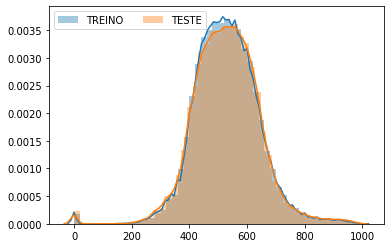

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 

x0 = dados_treino
x1 = dados_teste
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TREINO','TESTE'], ncol=2, loc='upper left')

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True, with_mean=False, with_std=True)
X_treino = sc.fit_transform(X_treino)  
X_teste = sc.transform(X_teste)

In [62]:
from sklearn.ensemble import RandomForestRegressor
modelo_rf = RandomForestRegressor(
    criterion='mse',
    max_depth=10,
    max_features=3,
    max_leaf_nodes=None,
    min_impurity_split=None,
    min_samples_leaf=2,
    min_samples_split=5,
    min_weight_fraction_leaf=0.0,
    ccp_alpha=0.01,
    max_samples=0.9,    
    n_estimators=500,
    n_jobs=1,
    random_state=0,
    verbose=0,
    warm_start=False
)

In [63]:
modelo_rf.fit(X_treino, Y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.01, criterion='mse',
                      max_depth=10, max_features=3, max_leaf_nodes=None,
                      max_samples=0.9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [64]:
y_pred_treino = modelo_rf.predict(X_treino)
y_pred_teste = modelo_rf.predict(X_teste)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

print(cross_val_score(modelo_rf, X_treino, Y_treino, cv = 5))
print(cross_val_score(modelo_rf, X_teste, Y_teste, cv = 5))
print(mean_squared_error(Y_treino, y_pred_treino))
print(mean_squared_error(Y_teste, y_pred_teste))

[0.61443369 0.61212746 0.612103   0.61669972 0.61024089]
[0.59607787 0.59347923 0.59368563 0.59662916 0.6072641 ]
1886.3095851633009
2056.1313090989256
